# 속성 데이터 분류 Template

# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/cau_2022/master/material/deep_learning/car_classification.csv

--2022-01-19 01:16:20--  https://raw.githubusercontent.com/dhrim/cau_2022/master/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.01s   

2022-01-19 01:16:20 (4.94 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [ ]:
!head car_classification.csv

MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,class
-0.6977467192333159,1.4820530265289593,1.0759145865834074,0.6632850838855407,0.6197483279305313,-1.2836175968153227,-1.62324090390216,0
-1.0821153447806173,1.4820530265289593,1.486831585109502,1.5725847792202352,0.8422576643639456,-1.464851604145538,-1.62324090390216,0
-0.6977467192333159,1.4820530265289593,1.1810328885319432,1.1828849097910805,0.5396920587375569,-1.646085611475753,-1.62324090390216,0
-0.9539924695981835,1.4820530265289593,1.0472459587792613,1.1828849097910805,0.536160164508455,-1.2836175968153227,-1.62324090390216,0
-0.8258695944157497,1.4820530265289593,1.028133540243164,0.9230849968383106,0.5549969337303313,-1.827319618805968,-1.62324090390216,0
-1.0821153447806173,1.4820530265289593,2.24177211728535,2.4299244919643757,1.6051468178499373,-2.008553626136183,-1.62324090390216,0
-1.210238219963051,1.4820530265289593,2.4806773489865677,3.0014843004604694,1.620451692842712,-2.371021640796613,-1.62

In [ ]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
print(train_x[:5])
print(train_y[:5])

[[ 0.19911341 -0.86291079 -0.86399589 -0.24601461 -0.7094212   0.70995648
  -1.6232409 ]
 [ 0.32723628 -0.86291079 -0.36707301 -0.32395459 -0.4621886  -0.37744756
   1.63432105]
 [ 0.58348203 -0.86291079 -0.93088936 -0.32395459 -0.81184613  0.52872248
  -1.08031391]
 [ 0.63473118 -0.86291079 -0.41485406 -0.37591457 -0.36211827  0.16625446
   0.81993056]
 [-1.3383611   1.48205303  1.48683159  1.83238469  1.32141798 -0.92114958
  -0.80885042]]
[1. 0. 2. 0. 0.]


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 7, 1)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 5)              20        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 5)             0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                      

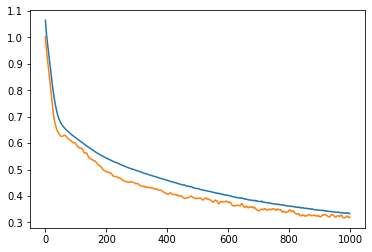

3/3 [==============================] - 0s 5ms/step - loss: 0.4357 - acc: 0.8228
loss= 0.4357373118400574
acc= 0.8227847814559937


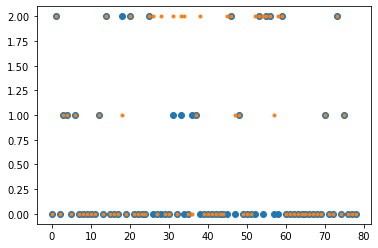

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Input, Reshape, Flatten


model = keras.Sequential()
model.add(Input((7,)))
model.add(Reshape((7,1)))
model.add(Conv1D(5, 3, padding="same"))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()

In [ ]:
print(y_.shape)

(79, 3)


In [ ]:
a = [ 0, 1 ]
print(a)
print(a[1])
print(a[-1])

[0, 1]
1
1


In [ ]:
model.add(Input((7,1)))
model.add(Conv1D(5, 3, padding="same"))
model.add(MaxPooling1D(2))


==================================================================

model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))


==================================================================

model.add(Input((120,32,32,3)))
model.add(Conv3D(32, (3, 3, 3), padding='same'))
model.add(MaxPooling3D((2, 2, 2)))




train_x.shape

(10000, 120,32,32,3)

















model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)
